In [29]:
# load libraries 
import pandas as pd
import numba as nb
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# import modelling tools
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# settings
color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")

In [39]:
# Load Dataset
df = pd.read_csv("./PJME_hourly.csv")
print(df.head()) # Shows first few lines of the data
print(df.tail()) # shows last few lines

              Datetime  PJME_MW
0  2002-12-31 01:00:00  26498.0
1  2002-12-31 02:00:00  25147.0
2  2002-12-31 03:00:00  24574.0
3  2002-12-31 04:00:00  24393.0
4  2002-12-31 05:00:00  24860.0
                   Datetime  PJME_MW
145361  2018-01-01 20:00:00  44284.0
145362  2018-01-01 21:00:00  43751.0
145363  2018-01-01 22:00:00  42402.0
145364  2018-01-01 23:00:00  40164.0
145365  2018-01-02 00:00:00  38608.0


## Ecploratory Data Analysis

Consider the dataset:  
This is hourly energy consumption dataset.  
Energy consumption for different regions. 
Data for 10 years. 

There are severa types of _time series data_:
- linear/non-linear trends
- seasonal patterns
- combinations

Also see stationary or non-stationary data.  

In [40]:
# Since data is consistent, we can set it as an index
df = df.set_index("Datetime") # set index to time
df.index

Index(['2002-12-31 01:00:00', '2002-12-31 02:00:00', '2002-12-31 03:00:00',
       '2002-12-31 04:00:00', '2002-12-31 05:00:00', '2002-12-31 06:00:00',
       '2002-12-31 07:00:00', '2002-12-31 08:00:00', '2002-12-31 09:00:00',
       '2002-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=145366)

__NOTE__ the time in this dataframe is `object`.  
We need to convert it to numbers:

In [42]:
# plotting dataframe
df.index = pd.to_datetime(df.index) # Cast as dat time
df.index

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

__NOTE__ now time is datatime64 which is a float 

<AxesSubplot: title={'center': 'PJME energy use'}, xlabel='Datetime'>

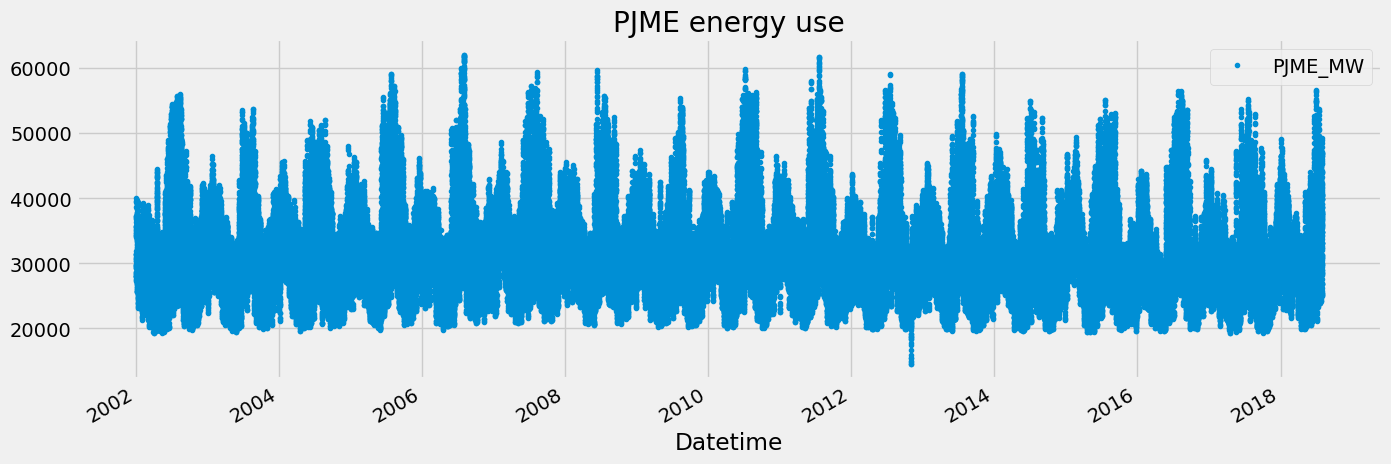

In [43]:
# Plot data
df.plot(style='.', figsize=(15,5), color=color_pal[0], title="PJME energy use")

### Train / test split
> Note, we do not do here production level splits

We set an arbitarary time for split, Jan 15. 


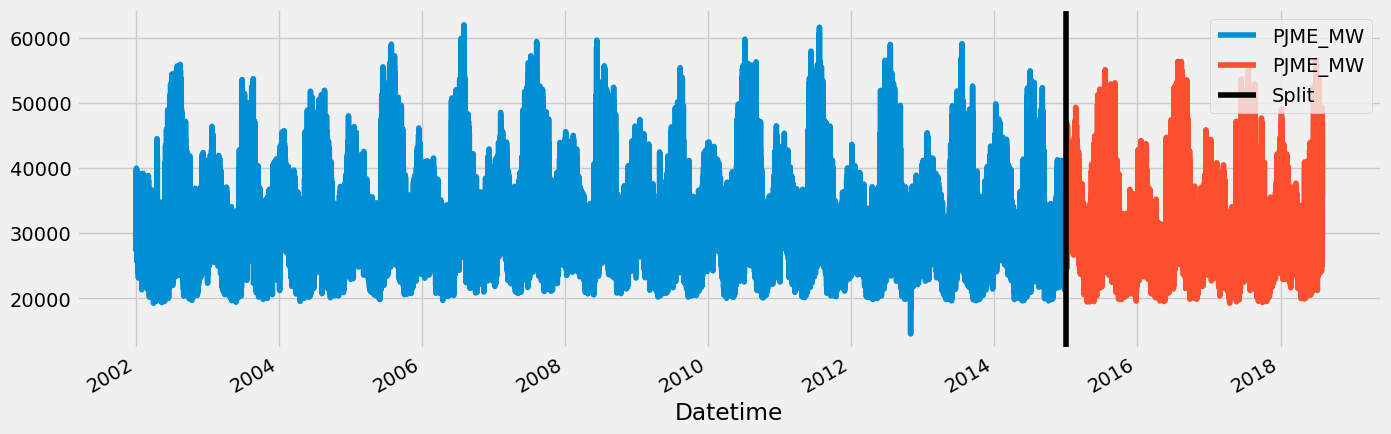

<AxesSubplot: xlabel='Datetime'>

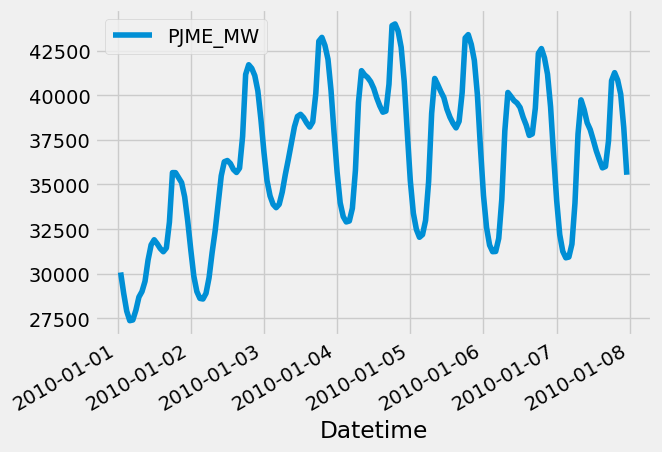

In [49]:
# create a test train split
train = df.loc[df.index < "01-01-2015"] 
test = df.loc[df.index >= "01-01-2015"]

# Plot the splited data
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label="Train")
test.plot(ax=ax, label="Test")
ax.axvline("01-01-2015",color="black",label="Split")
plt.legend()
plt.show()

# Consider a one week of data (month is second)
df.loc[(df.index > "01-01-2010") & (df.index < "01-08-2010")].plot()



__Note__ the periodicity in data for 
- day-night cycle
- day-to-day cycle (weekend effect)

## Feature Creation


In [59]:

def create_features(df : pd.DataFrame) -> pd.DataFrame:
    """ Add features to dataframe """
    # Getting hour values for each date (0-24):
    df['hour'] = df.index.hour
    # getting number describing what day of the week it is 
    # (Monday is 0 and Sunday is 6)
    df['dayofweek'] = df.index.day_of_week
    # Getting the quarter (1/4 of the year)
    df["quarter"] = df.index.quarter
    # month
    df["month"] = df.index.month
    # year
    df["year"] = df.index.year
    # day of the year
    df["dayofyear"] = df.index.day_of_year
    return df
df = create_features(df=df)

 visualize feature-to-target relationship 
using seaborn boxplot (that give you the distribution of the data)

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, )